In [1]:
import torch
from torch.distributions import multinomial

In [2]:
fair_probs = torch.ones([6])
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 5., 0., 0., 2., 2.])

In [4]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1650, 0.1710, 0.1740, 0.1540, 0.1640, 0.1720])

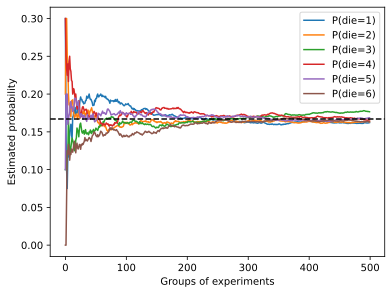

In [5]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

import tools as tl
tl.set_figsize((6, 4.5))
for i in range(6):
    tl.plt.plot(estimates[:, i].numpy(), label=('P(die=' + str(i + 1) + ')'))
tl.plt.axhline(y=0.167, color='black', linestyle='dashed')
tl.plt.gca().set_xlabel('Groups of experiments')
tl.plt.gca().set_ylabel('Estimated probability')
tl.plt.legend()